<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-read-package-and-file,-preliminary-overview-on-dataframe" data-toc-modified-id="Load-and-read-package-and-file,-preliminary-overview-on-dataframe-1">Load and read package and file, preliminary overview on dataframe</a></span></li><li><span><a href="#Task1:-Cleaning-Data" data-toc-modified-id="Task1:-Cleaning-Data-2">Task1: Cleaning Data</a></span></li><li><span><a href="#Task2:-Analyze-data" data-toc-modified-id="Task2:-Analyze-data-3">Task2: Analyze data</a></span><ul class="toc-item"><li><span><a href="#2.1:-Central-tendency-and-Dispersion:-Customer's-age-distribution" data-toc-modified-id="2.1:-Central-tendency-and-Dispersion:-Customer's-age-distribution-3.1">2.1: Central tendency and Dispersion: Customer's age distribution</a></span></li><li><span><a href="#2.2:-Concentration-analysis-:Lorenz-Curve-and-Gini-coefficient---customer's-age" data-toc-modified-id="2.2:-Concentration-analysis-:Lorenz-Curve-and-Gini-coefficient---customer's-age-3.2">2.2: Concentration analysis :Lorenz Curve and Gini coefficient - customer's age</a></span></li><li><span><a href="#2.3:-Graphic-representations" data-toc-modified-id="2.3:-Graphic-representations-3.3">2.3: Graphic representations</a></span><ul class="toc-item"><li><span><a href="#2.3.1:-Boxplot-Product-Category-VS-Price---purpose:-to-check-price-range-per-product-category" data-toc-modified-id="2.3.1:-Boxplot-Product-Category-VS-Price---purpose:-to-check-price-range-per-product-category-3.3.1">2.3.1: Boxplot Product Category VS Price - purpose: to check price range per product category</a></span></li><li><span><a href="#2.3.2:-Times-series-Month-VS-Transaction-Amount" data-toc-modified-id="2.3.2:-Times-series-Month-VS-Transaction-Amount-3.3.2">2.3.2: Times series Month VS Transaction Amount</a></span></li><li><span><a href="#2.3.3:-Bivariate-Analysis-Visualzation:-Age-VS-Price-of-item-purchased---Scatter-Plot" data-toc-modified-id="2.3.3:-Bivariate-Analysis-Visualzation:-Age-VS-Price-of-item-purchased---Scatter-Plot-3.3.3">2.3.3: Bivariate Analysis Visualzation: Age VS Price of item purchased - Scatter Plot</a></span></li><li><span><a href="#2.3.4:-Pice-chart-for-Product-Category" data-toc-modified-id="2.3.4:-Pice-chart-for-Product-Category-3.3.4">2.3.4: Pice chart for Product Category</a></span></li></ul></li></ul></li><li><span><a href="#Task3:-Answering-questions" data-toc-modified-id="Task3:-Answering-questions-4">Task3: Answering questions</a></span><ul class="toc-item"><li><span><a href="#3.1:Correlation-Gender-VS-Categories-of-Products" data-toc-modified-id="3.1:Correlation-Gender-VS-Categories-of-Products-4.1">3.1:Correlation Gender VS Categories of Products</a></span></li><li><span><a href="#3.2:-Correlation-Age-VS-Total-Amount-Purchase" data-toc-modified-id="3.2:-Correlation-Age-VS-Total-Amount-Purchase-4.2">3.2: Correlation Age VS Total Amount Purchase</a></span></li><li><span><a href="#3.3:-Correlaton-Age-VS-Purchase-Frequency" data-toc-modified-id="3.3:-Correlaton-Age-VS-Purchase-Frequency-4.3">3.3: Correlaton Age VS Purchase Frequency</a></span></li><li><span><a href="#3.4-Correlation-Age-VS-Avergage-basket-size(in-number-of-items)" data-toc-modified-id="3.4-Correlation-Age-VS-Avergage-basket-size(in-number-of-items)-4.4">3.4 Correlation Age VS Avergage basket size(in number of items)</a></span></li><li><span><a href="#3.5-Correlation-Age-VS-Category-of-purchase-produducts" data-toc-modified-id="3.5-Correlation-Age-VS-Category-of-purchase-produducts-4.5">3.5 Correlation Age VS Category of purchase produducts</a></span></li></ul></li></ul></div>

# Load and read package and file, preliminary overview on dataframe

* Load three main CSV file: customers, products, transactions and explore what are information included in each table by using .head()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers=pd.read_csv('customers.csv')
products=pd.read_csv('products.csv')
transactions=pd.read_csv('transactions.csv')



In [3]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [4]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [5]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


# Task1: Cleaning Data 


Cleaning customers datafrme: correct data type, add age column for future analysis, get rid of testing customer ids

In [6]:
customers['year']=int('2021')
customers['age']=customers['year']-customers['birth']
customers=customers.loc[(customers['client_id'] != 'ct_1')&(customers['client_id'] != 'ct_0')]
customers.head()

,client_id,sex,birth,year,age
0,c_4410,f,1967,2021,54
1,c_7839,f,1975,2021,46
2,c_1699,f,1984,2021,37
3,c_5961,f,1962,2021,59
4,c_5320,m,1943,2021,78


Cleaning transactions dataframe: get rid of outliers on id_prod,session_id,client_id,date columns. Also change formate of date column into datetime and add new column month, for future analysis

In [7]:
transactions=transactions.loc[(transactions['id_prod'] != "T_0")]
transactions=transactions.loc[(transactions['session_id'] != "s_0")]
transactions=transactions.loc[(transactions['client_id'] != 'ct_1')&(transactions['client_id'] != 'ct_0')]
boolean_finding= transactions['date'].str.contains('test_').any()
boolean_finding
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S.%f',errors='coerce')
transactions['month'] = transactions['date'].dt.month
transactions.dropna(subset = ["month"], inplace=True)
transactions.head()

,id_prod,date,session_id,client_id,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,9
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,7


Cleaning products dataframe, only filter products price more than 0 value.

In [8]:
products=products[products.price > 0]
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


# Task2: Analyze data 


Visualization data in various perspectives. 

1.Analysis on Customers age: to check central tendency of customer's age using histogram, visualization lorend curve and calculate gini coefficient\
2.Bivariate analysis on product category VS product price: to check price variance of each product category using boxplot\
3.Time series visualization: to see purchase trend over months\
4.Pie chart on product category: to see product distribution

## 2.1: Central tendency and Dispersion: Customer's age distribution

Text(46.9968333140007, 1365.525, 'Mean: 42.72')

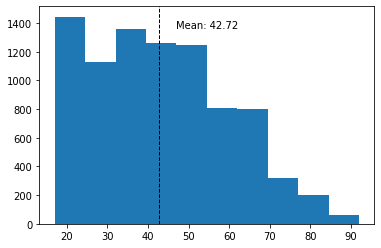

In [9]:
plt.hist(customers.age, bins = 10)
plt.axvline(customers.age.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(customers.age.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(customers.age.mean()))


## 2.2: Concentration analysis :Lorenz Curve and Gini coefficient - customer's age

In [10]:
customers.head()

,client_id,sex,birth,year,age
0,c_4410,f,1967,2021,54
1,c_7839,f,1975,2021,46
2,c_1699,f,1984,2021,37
3,c_5961,f,1962,2021,59
4,c_5320,m,1943,2021,78


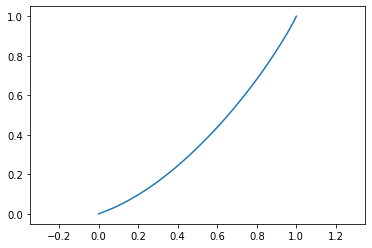

In [11]:
ages = customers.iloc[:,4]
age = ages.values
n = len(age)
lorenz = np.cumsum(np.sort(age)) / age.sum()
lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()



In [12]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.22594000556853144

## 2.3: Graphic representations

### 2.3.1: Boxplot Product Category VS Price - purpose: to check price range per product category

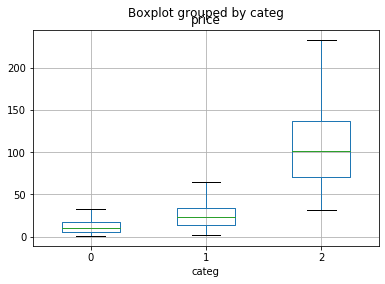

In [13]:
products.boxplot(by ='categ', column =['price'],showfliers=False, widths=(0.5, 0.5,0.5)) 


### 2.3.2: Times series Month VS Transaction Amount

In [14]:
transactions.head()

,id_prod,date,session_id,client_id,month
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,2
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,9
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,10
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,7


In [15]:
transactions.month.value_counts()

9     33266
12    32424
2     29567
1     29316
3     28568
4     28415
11    28277
5     28245
6     26819
8     25619
7     24716
10    21584
Name: month, dtype: int64

In [16]:
monthly_transactions=transactions.groupby('month')['session_id'].count()
monthly_transactions = pd.DataFrame(monthly_transactions).reset_index()
monthly_transactions
#monthly_transactions['month'] = pd.to_datetime(monthly_transactions['month'].astype(str), format='%m')
#monthly_transactions['month']= monthly_transactions['month'].dt.month
#monthly_transactions.set_index('month',inplace=True)

monthly_transactions

,month,session_id
0,1,29316
1,2,29567
2,3,28568
3,4,28415
4,5,28245
5,6,26819
6,7,24716
7,8,25619
8,9,33266
9,10,21584


([<matplotlib.axis.YTick at 0x17244633448>,
 <a list of 20 Text yticklabel objects>)

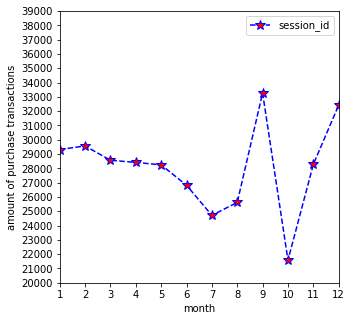

In [31]:

monthly_transactions.plot(x='month',y='session_id',figsize=(5,5),linestyle='--', marker='*', markerfacecolor='r',color='b',markersize=10)
plt.xlabel('month')
plt.ylabel('amount of purchase transactions')
plt.xticks(np.arange(1, 13, 1.0))
plt.yticks(np.arange(20000, 40000, 1000.0))

### 2.3.3: Bivariate Analysis Visualzation: Age VS Price of item purchased - Scatter Plot

In [18]:
transactions_products_info=pd.merge(transactions,products,on='id_prod')
merged=pd.merge(customers,transactions_products_info,on='client_id')
merged=merged.fillna(0)
merged=merged.reset_index()
merged

,index,client_id,sex,birth,year,age,id_prod,date,session_id,month,price,categ
0,0,c_4410,f,1967,2021,54,0_1420,2021-03-22 22:31:25.825764,s_10092,3,11.53,0
1,1,c_4410,f,1967,2021,54,0_1390,2021-09-24 23:35:40.652636,s_94984,9,19.37,0
2,2,c_4410,f,1967,2021,54,1_483,2021-03-13 21:35:55.949042,s_5913,3,15.99,1
3,3,c_4410,f,1967,2021,54,1_267,2021-09-24 23:15:59.919591,s_94984,9,27.99,1
4,4,c_4410,f,1967,2021,54,1_395,2021-09-24 23:57:35.138518,s_94984,9,28.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...
336708,336708,c_84,f,1982,2021,39,0_1113,2021-04-13 04:10:27.679097,s_19845,4,16.99,0
336709,336709,c_84,f,1982,2021,39,0_1525,2021-10-21 03:58:28.880240,s_107849,10,6.99,0
336710,336710,c_84,f,1982,2021,39,0_1017,2021-09-13 21:40:46.038481,s_89478,9,8.99,0
336711,336711,c_84,f,1982,2021,39,1_158,2021-10-01 16:11:20.841361,s_98493,10,22.17,1


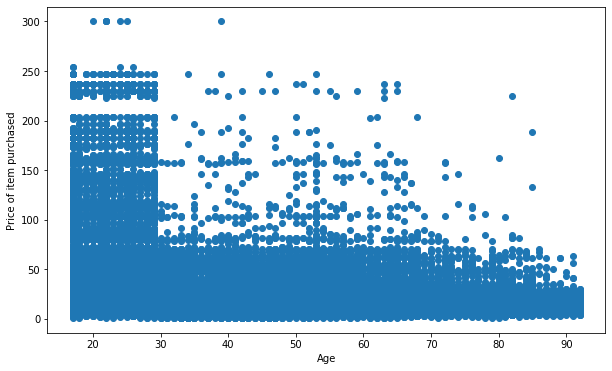

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = merged['age'], y = merged['price'])
plt.xlabel("Age")
plt.ylabel("Price of item purchased")
plt.show()

### 2.3.4: Pice chart for Product Category

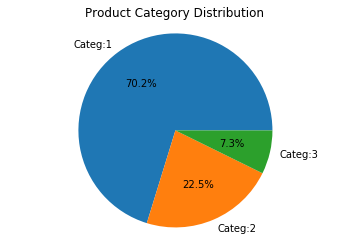

In [20]:
products_categ=products.groupby('categ')['id_prod'].count()
products_categ= pd.DataFrame(products_categ)
products_categ=products_categ.reset_index()
products_categ=products_categ.loc[:,:]
products_categ=products_categ['id_prod']
products_categ=products_categ.to_numpy()
my_labels = 'Categ:1','Categ:2','Categ:3'
plt.pie(products_categ,labels=my_labels,autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.axis('equal')
plt.show()


# Task3: Answering questions

## 3.1:Correlation Gender VS Categories of Products

Find a correlation between two qualitative variables with xi_n formula and create color-coded contingency table 

In [21]:
#https://aaronschlegel.me/chi-square-test-independence-contingency-tables.html

from sklearn.metrics import r2_score
from scipy import stats
from functools import reduce
X = "categ"
Y = "sex"
observation = merged[['categ','sex']].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
observation=observation.reset_index()
observation=observation.set_index('categ')

observation = observation[['f', 'm']]
observation=observation.iloc[0:3]

observation

sex,f,m
categ,,
0,103786,105640
1,55469,54266
2,8260,9292


In [22]:
observation = observation.to_numpy()
observation
c = np.apply_over_axes(np.sum, observation, 0) # column totals of observations table
r = np.apply_over_axes(np.sum, observation, 1) # row totals of observations table
exp_freq = reduce(np.multiply, (r, c)) / np.sum(observation)
cont_table = np.absolute(observation - exp_freq)
cont_table= cont_table ** 2 / exp_freq
cont_table

array([[ 1.563511  ,  1.54795888],
       [14.0480737 , 13.90833855],
       [25.5276867 , 25.27376469]])

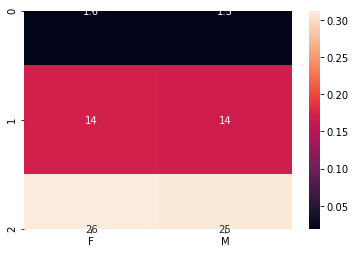

In [23]:
cont_table=pd.DataFrame(cont_table)
cont_table=cont_table.rename(columns={0: 'F', 1: 'M'})
xi_n = cont_table.sum().sum()
sns.heatmap(cont_table/xi_n,annot=cont_table)

plt.show()


## 3.2: Correlation Age VS Total Amount Purchase

find correlation between age and total amount purchase - two quantitative variables using pearson's R, R^2

In [25]:
## two quantitative variables 
total_amount_purchase=merged.groupby('age')['price'].sum()
total_amount_purchase=total_amount_purchase.to_frame().reset_index()
total_amount_purchase.corr(method='pearson')

#Strong negative relationship

,age,price
age,1.000000,-0.774658
price,-0.774658,1.000000


## 3.3: Correlaton Age VS Purchase Frequency 

find correlation between age and purchase frequencey: two quantitative variables using R^2

In [26]:
purchase_frequency=merged.groupby('age')['month'].count()
purchase_frequency=purchase_frequency.to_frame().reset_index()
purchase_frequency.corr(method='pearson')
# Moderate negative relationship

,age,month
age,1.000000,-0.529287
month,-0.529287,1.000000


## 3.4 Correlation Age VS Avergage basket size(in number of items)

find correlation between age and average basket size: two quantitative variables using R^2

In [27]:
average_basket_size=merged.groupby('age')['categ'].count()
average_basket_size=average_basket_size.to_frame().reset_index()
average_basket_size.corr(method='pearson')

# How to interprete correlation : https://www.investopedia.com/ask/answers/041015/what-does-negative-correlation-coefficient-mean.asp#:~:text=A%20negative%20correlation%20can%20indicate,is%20the%20strongest%20relationship%20possible.
#  Moderate negative relationship 

,age,categ
age,1.000000,-0.529287
categ,-0.529287,1.000000


## 3.5 Correlation Age VS Category of purchase produducts

find correlation between age and category of purchase product: one quantitative and one qualitative variable using eta^2

##linear regression with categorical variables python
##correlation example https://www.vertica.com/blog/in-database-machine-learning-2-calculate-a-correlation-matrix-a-data-exploration-post/
R2
corr=merged.corr('pearson') 
corr
x_age=np.array(merged.sex)
y_category=np.array(merged.categ)
correlation_matrix = np.corrcoef(x_age, y_category)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)

In [ ]:
category_purchased_products=merged.groupby(['age', 'categ'])['session_id'].count()
category_purchased_products=category_purchased_products.to_frame().reset_index()
category_purchased_products = category_purchased_products.rename(columns={'session_id': 'categ_count'})
category_purchased_products


In [ ]:
X = "categ" # qualitative
Y = "age" # quantitative

sub_sample = category_purchased_products[category_purchased_products["age"] > 0] 

def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS
 
eta_squared(sub_sample['categ'],sub_sample['age'])

## We could say there is low correlation between age and category of item they purchase